
### Telephone-Internet Customer Churn Prediction Using Tree-Based and Boosting Models
--------------------------------------------
**The Main Part of This Project:**

- **Part 1: Comprehensive Exploratory Data Analysis**

- **Part 2: Churn Cohort Analysis**

- **Part 3: Tree-based and Boosting ML Predictive Models**

- **Part 4: Improving Models Performance by Oversampling Minority Class**


**About the dataset:**

The data set used for this article's classification problem is taken from IBM sample data set collection. The data set includes information about:

- Customers who left within the last month – the column is called Churn.

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
  
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

- Demographic info about customers – gender, age range, and if they have partners and dependents


In [20]:
# Import necessary libraries and suppress the specific FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**Confirming quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
# Get a quick statistical summary of the numeric columns with .describe()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Notice that many columns are categorical, meaning we will eventually need to convert them to dummy variables.**

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

First we need to confirm that there are no NaN cells by displaying NaN values per feature column.

In [18]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

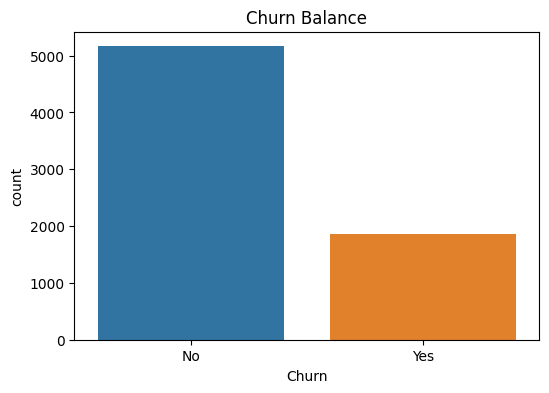

In [21]:
# Display the balance of the class labels (Churn) 
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Churn', hue='Churn')

plt.title('Churn Balance');

Although the label class is not balanced, we are not dealing with a extream unbalanced label class either. It seems that we have `~55%-60%` of the data for not churning and `~35%-40%` for churning. Usually a **proportion of 9 to 1 or 10 to 1** is considered to be an unbalanced class.

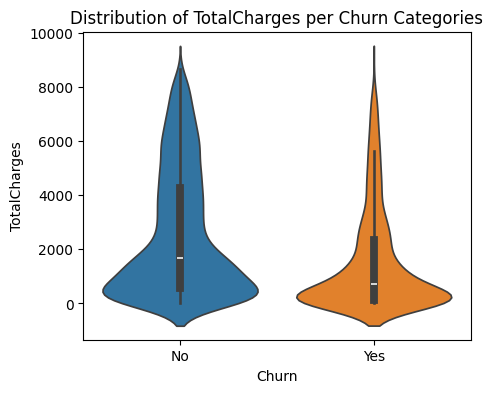

In [22]:
# Display the distribution of 'TotalCharges' between Churn categories
plt.figure(figsize=(5, 4))

sns.violinplot(data=df, x='Churn', y='TotalCharges', hue='Churn')

plt.title('Distribution of TotalCharges per Churn Categories');

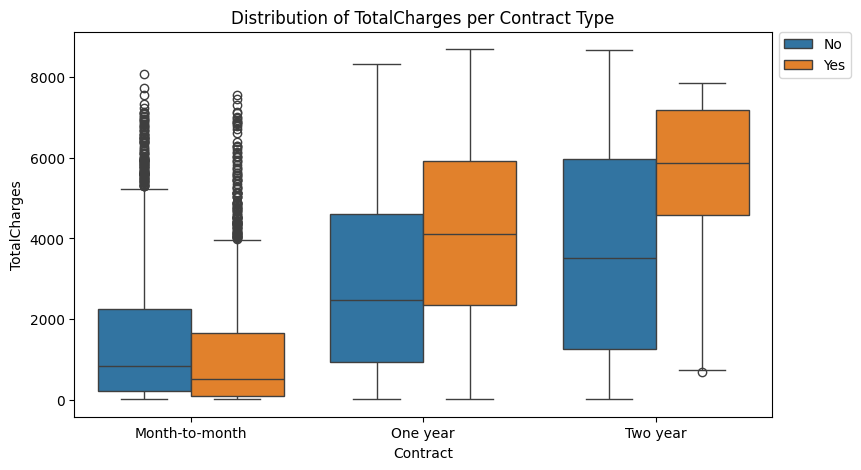

In [23]:
# Display the distribution of 'TotalCharges' per 'Contract type'
plt.figure(figsize=(9, 5))

sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

plt.title('Distribution of TotalCharges per Contract Type')
plt.legend(loc=(1.01, 0.88));

### The interpretation of the plot:

- For `month-to-month` users the distribution of data for people who have churned and not churned are very similar, and it is expected to be like this! Because people who sign up for a service with a `month-to-month` subscription do not expect to remain on the service for a long time.

- However, the story is different for users who have `one year contract` and `two year contract`. These are actually users that we might want to investigate more to see how we can prevent their churn percentage. It is clear from the plot above that for both groups **the total charges increase the higher rate of churn happens**.

Therefore, from a bussiness prespective, it would be a wise step to offer a sort of **bonus program** to users with more than a year contract with the company in order to incentivise them to keep their subscription and bring down their total charges.

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [24]:
# Create a list of features and the label we want to investigate
features_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Get the dummy variables of them and call the corr() method off of it
corr_df = pd.get_dummies(df[features_list], drop_first=False).corr()
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [26]:
# Get the correlations with respect to 'Churn_yes' and sort the values
churn_yes_corr = corr_df['Churn_Yes'].sort_values()[1:-1]
churn_yes_corr

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

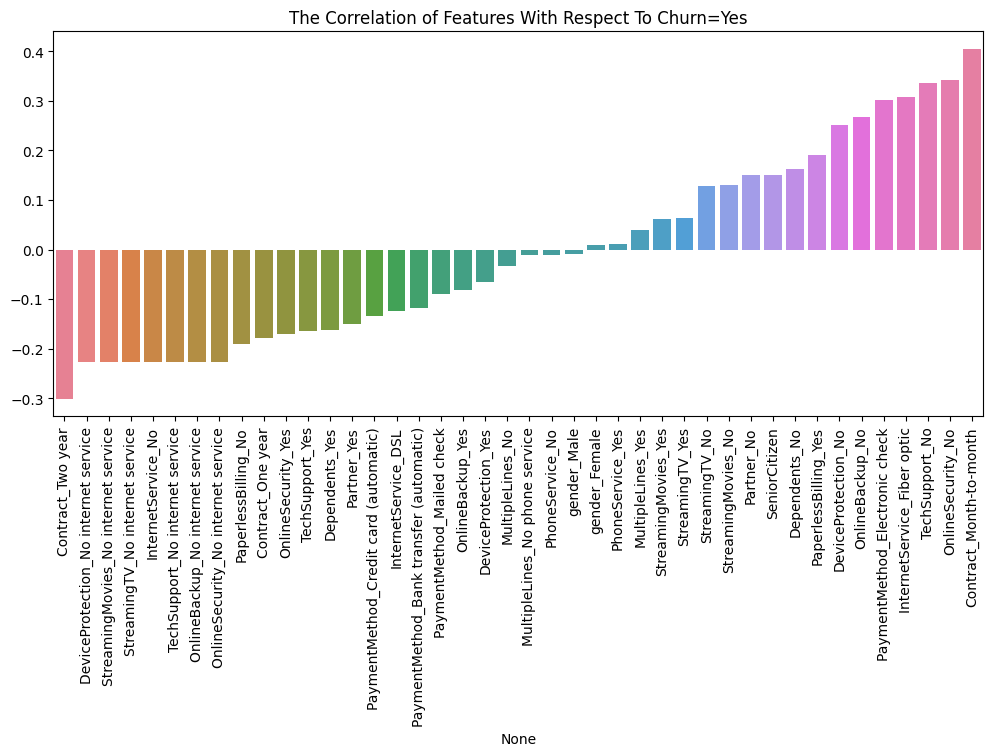

In [27]:
# Display the result of the series above on a barplot
plt.figure(figsize=(12, 5))

sns.barplot(x=churn_yes_corr.index, y=churn_yes_corr.values, hue=churn_yes_corr.index)

plt.title('The Correlation of Features With Respect To Churn=Yes')
plt.xticks(rotation=90);


So the highly-correlated feature with churning=Yes is the `Contract_Month-to-month` feature which makes sence. Usually people who sign up for a monthly service are more likely to get out of their plans as opposed to people who are locked up into `two-year contracts`.

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [28]:
# Check the unique contract types
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Now let's create a histogram of `tenure` column which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

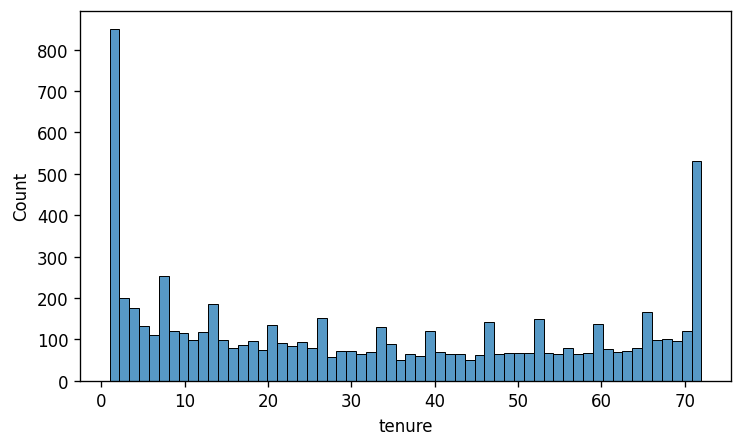

In [29]:
# Create a histogram displaying the distribution of 'tenure' column
plt.figure(figsize=(7, 4), dpi=120)

sns.histplot(df['tenure'], bins=60)

There are many more people in our data that are/have been service users for only 1 or 2 months! Also, there are many people who have been the users of this company for more than two years.

**Now I am going to create histograms separated by two additional features, `Churn` and `Contract`.**

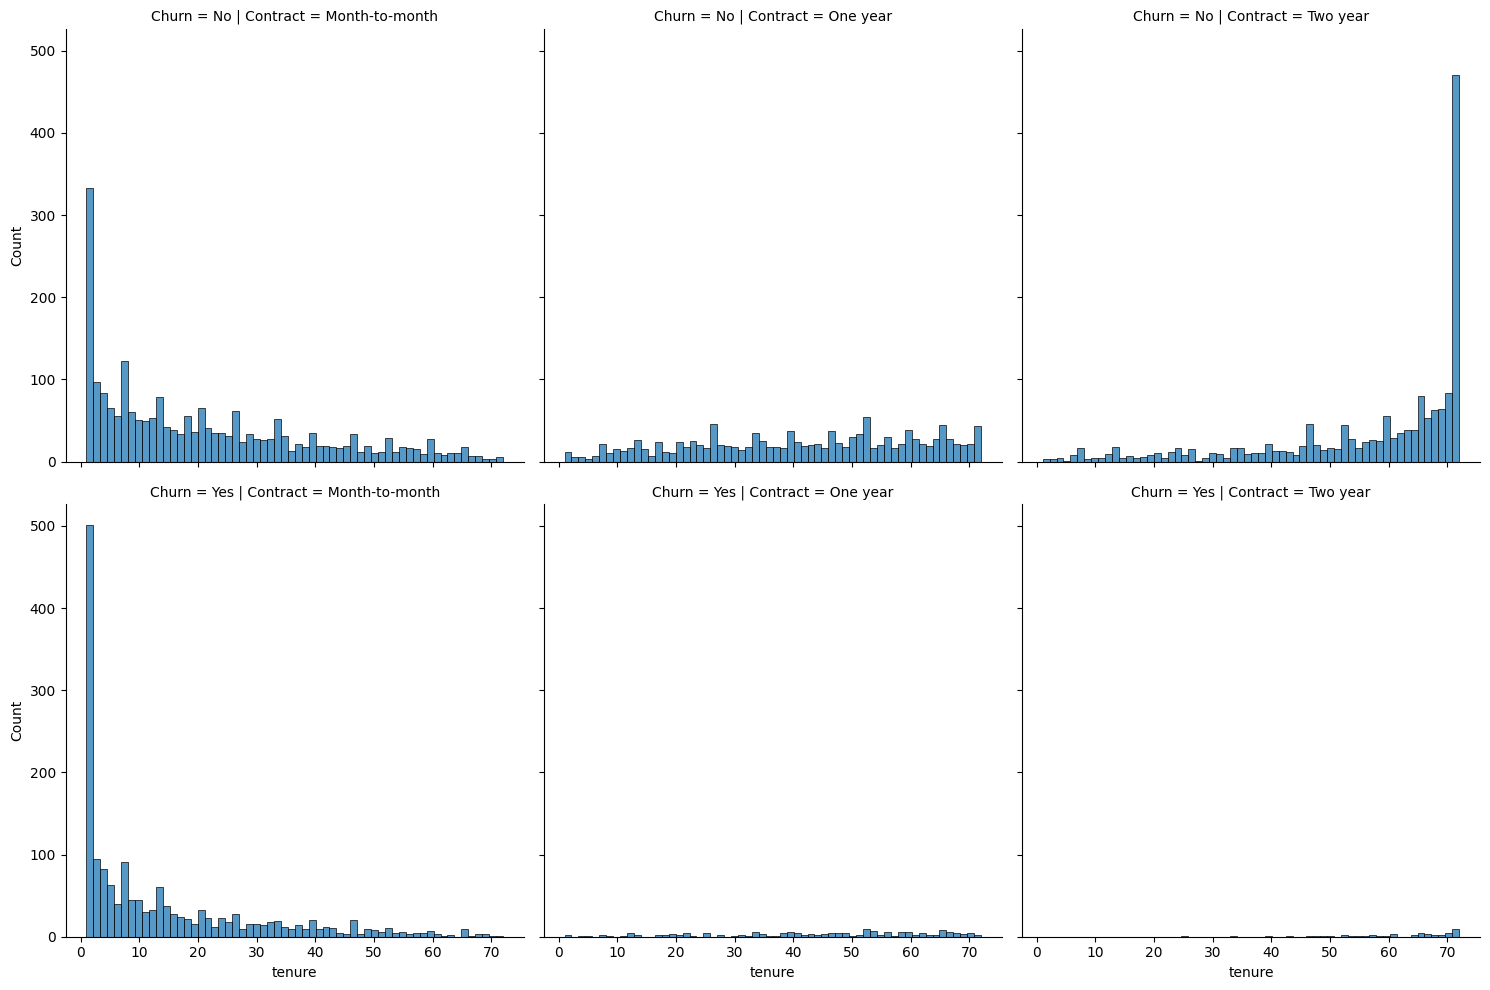

In [30]:
sns.displot(df, x='tenure', row="Churn", col="Contract", bins=60);


### Interpretation:

It is clear from the plots above that most of the churned users are on `Month-to-month` contracts and with `less than a year tenure`. Therefore, we really not need to be worry about people who have 1-year or 2-year contracts since they are very unlikely to churn.

The interesting point is that we are dealing with almost same distribution of people who are in `Month-to-month` contracts with **different churn status**! And why are there some people who have had a tenure of 10-40 months but have not signed up for 1-year or 2-year contracts? 

Maybe we can approach those people with special offers and bonuses and tell them they can convert to **1-year or 2-year contracts** and lower their monthly charges! In this way they might be willing to stay and not churn!


**Now let's investigate a few more variables in more details:**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

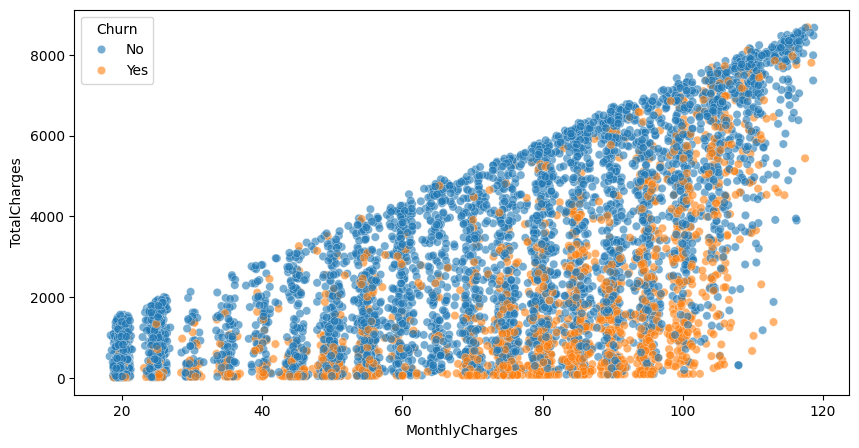

In [31]:
# Display a scatter plot of 'Total Charges' versus 'Monthly Charges'
plt.figure(figsize=(10, 5), dpi=100)

sns.scatterplot(data=df, x=df['MonthlyCharges'], y=df['TotalCharges'], hue='Churn', alpha=0.6, linewidth=0.3)

### Creating Cohorts based on Tenure

Now I will begin by treating each **unique tenure length**, 1 month, 2 month, 3 month...N months as its own cohort.

Essentially I'll be treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. `For example, the cohort that has had a tenure of 1 month should have a Churn rate of X%`. We are going to have cohorts of 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as people are less likely to stop service the longer you've had it.

In [32]:
# Make a new dataframe and group it by `tenure` and sum up the churn values
new_df = pd.get_dummies(df[['Churn', 'tenure']])
cohort_tenure = new_df.groupby('tenure').sum('Churn_Yes')
cohort_tenure

,Churn_No,Churn_Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


In [33]:
# Calculate the churn rate percentage
churn_percent = cohort_tenure['Churn_Yes'] / (cohort_tenure['Churn_Yes'] + cohort_tenure['Churn_No']) * 100
churn_percent 

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

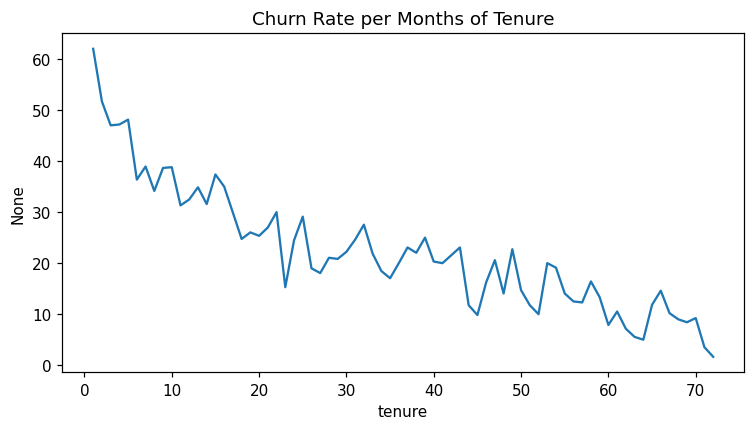

In [34]:
plt.figure(figsize=(8, 4), dpi=110)

sns.lineplot(data=cohort_tenure, x=cohort_tenure.index, y=churn_percent)

plt.title('Churn Rate per Months of Tenure');

Again, the lineplot above approves the fact that the `churn rate` **decreses** for users with `more tenure`.

### Broader Cohort Groups
**Now let's create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [35]:
# Define a function that takes in a tenure column and returns a string
def make_tenure_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [36]:
# Apply the function on the dataframe
df['Tenure Cohort'] = df['tenure'].apply(make_tenure_cohort)
df[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


**Now I'll create a scatterplot of `Total Charges` versus `Monthly Charts`, this time colored by `Tenure Cohort` defined in the previous task.**

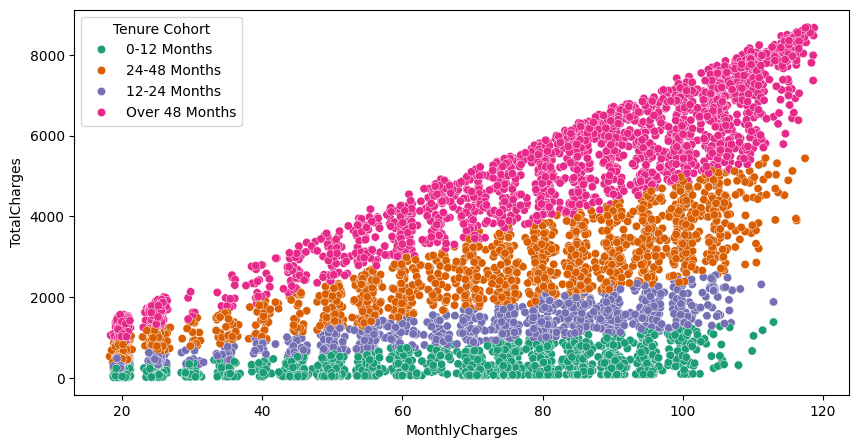

In [37]:
# Display a scatter plot of 'Total Charges' versus 'Monthly Charges'
plt.figure(figsize=(10, 5), dpi=100)

sns.scatterplot(data=df, x=df['MonthlyCharges'], y=df['TotalCharges'], hue='Tenure Cohort', linewidth=0.3, palette='Dark2');

It was expected to see that people who have been using the service for a longer period of time have more `Total Charges` compared to relatively new people, and the plot above validates this fact.

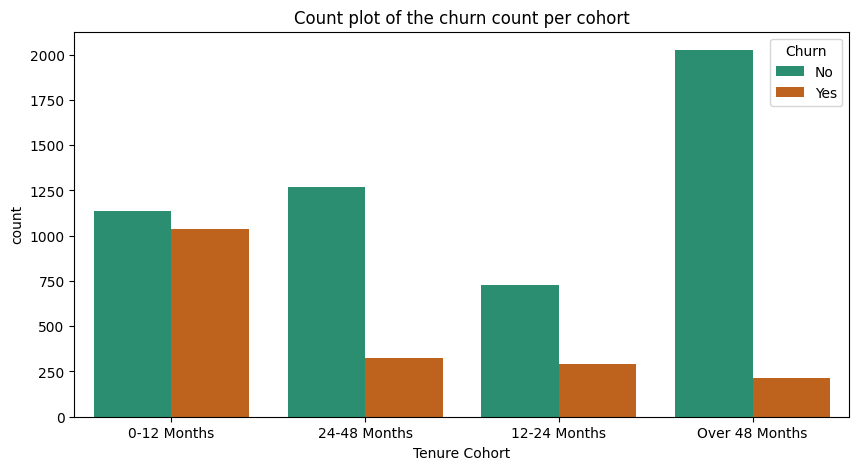

In [38]:
# Display a count plot showing the churn count per cohort
plt.figure(figsize=(10, 5), dpi=100)

sns.countplot(data=df, x=df['Tenure Cohort'], hue='Churn', palette='Dark2')

plt.title('Count plot of the churn count per cohort');

Again, we can clearly see that people in `over 48 months` cohort tend to stay and not churn compared to those who are in `0-12 months`.

<Figure size 1000x500 with 0 Axes>

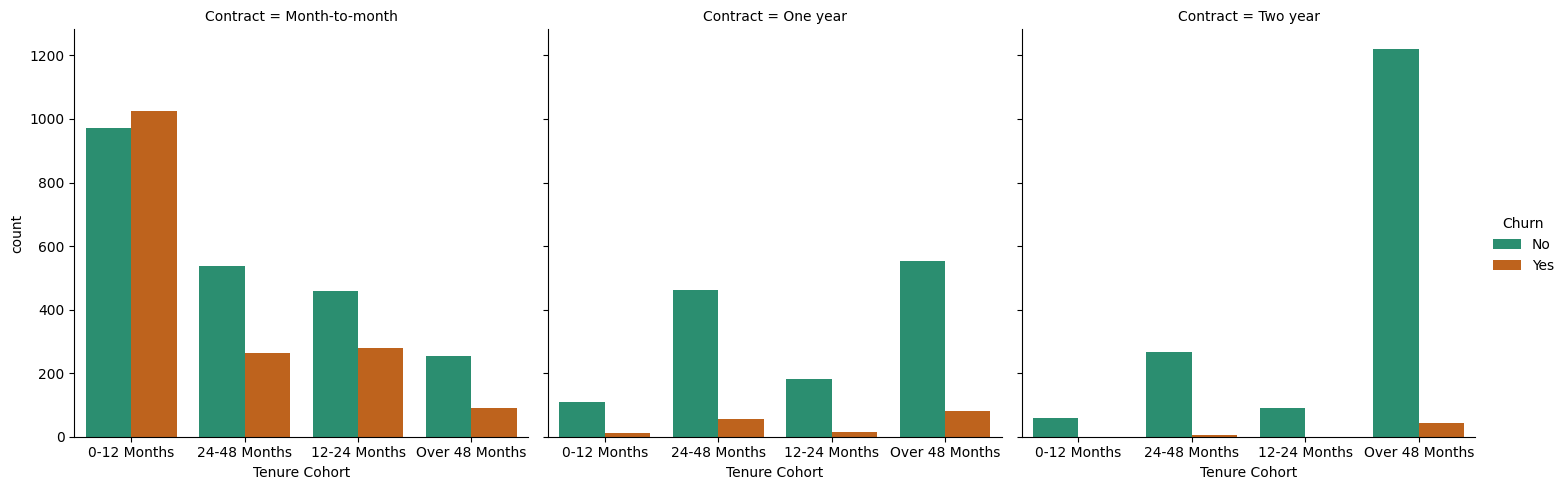

In [39]:
# Display the counts per Tenure Cohort, separated out by contract type and colored by the Churn hue
plt.figure(figsize=(10, 5), dpi=100)

sns.catplot(data=df, x=df['Tenure Cohort'], col='Contract', hue='Churn', palette='Dark2', kind='count');

# Part 4: Predictive Modeling

**For the final part of this project, I am going to explore 4 different tree based methods: A `Single Decision Tree`, `Random Forest`, `AdaBoost`, and `Gradient Boosting`.**


## Single Decision Tree

First, I am going to separate out the data into X features and Y label. Note that the initial dataframe's most features are categorical, so we need to get them to numerical. Also, the `customerID` column is not an indicator so I'll drop it. I also drop the `gender` column for ethical reasons since I don't want the model to predict based off the gender of a person.

In [40]:
# Seprate the features and the label
X = df.drop(['customerID', 'gender', 'Churn'], axis=1)
y = df['Churn']

# Convert categorical features to numerics
X = pd.get_dummies(X, drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1,0,34,56.95,1889.50,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,0,45,42.30,1840.75,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,False,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False


**Now let's perform a train test split, holding out 10% of the data for testing.**

In [52]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=13)

In [53]:
print('X_train size: ', X_train.shape)
print('y_train size: ', y_train.shape)
print('X_test size: ', X_test.shape)
print('y_test size: ', y_test.shape)

X_train size:  (6328, 32)
y_train size:  (6328,)
X_test size:  (704, 32)
y_test size:  (704,)


### Single Decision Tree Model:
**The steps I am going to perform are as follows:**
   1. Train a single decision tree model with a grid search for optimal hyperparameters.
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   3. Calculate feature importances from the decision tree and plot them on a barplot.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Instanciate a based decision tree object
tree_model = DecisionTreeClassifier()

# Create the param_grid dictionary for performing the grid search on hyper-parameters
param_grid = {
    'max_depth': [10, 25, 35, 45],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'log2']
}

# Instanciate the grid search object
tree_grid_model = GridSearchCV(estimator=tree_model, param_grid=param_grid)

# Fit the model into training data
tree_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 25, 35, 45],
                         'max_features': [None, 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [55]:
# Print the best parameters and the best score
print("Best parameters found: ", tree_grid_model.best_params_)

# Get the predictions
pred_tree = tree_grid_model.predict(X_test)

print('The classification Report: ')
print()
print(classification_report(y_test, pred_tree))

Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
The classification Report: 

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       520
         Yes       0.61      0.46      0.53       184

    accuracy                           0.78       704
   macro avg       0.72      0.68      0.69       704
weighted avg       0.77      0.78      0.77       704



The Confusion Matrix: 



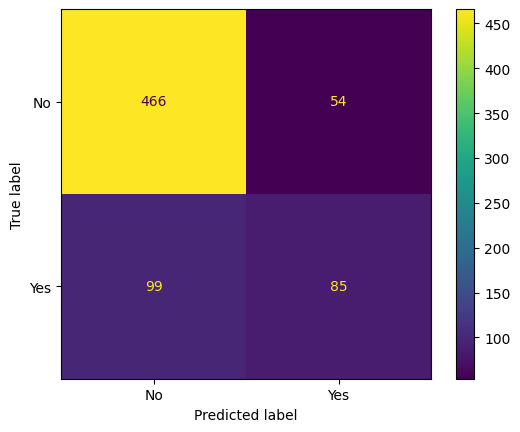

In [56]:
print('The Confusion Matrix: ')
print()
cm = confusion_matrix(y_test, pred_tree)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_grid_model.classes_).plot();

So for my first model which was a **grid searched single decision tree**, I got an overal accuracy of **0.78** on the hold-out set. I am going to create a dataframe of test results and append each models' accuracy to it, so we would be able to see the results next to each other and compare them easily.

In [57]:
# Import necessary metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score

# Initialize the DataFrame
results_df = pd.DataFrame(columns=['Model', 'Recall', 'F1 Score', 'Accuracy'])

def evaluate_and_append_results(model_name, fitted_model, X_test, y_test, results_df):
    """
    Evaluates the given model on the test data and appends the results to the DataFrame.

    Parameters:
    - model_name: str, name of the model
    - fitted_model: the fitted model object
    - X_test: array-like, test features
    - y_test: array-like, test labels
    - results_df: DataFrame, the DataFrame to append the results to

    Returns:
    - results_df: DataFrame, the updated DataFrame with the new results
    """
    # Make predictions
    y_pred = fitted_model.predict(X_test)

    # Compute metrics
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    accuracy = accuracy_score(y_test, y_pred)

    # Create a DataFrame with the new results
    new_results = pd.DataFrame({
        'Model': [model_name],
        'Recall': [recall],
        'F1 Score': [f1],
        'Accuracy': [accuracy]
    })

    # Concatenate the new results to the existing DataFrame
    results_df = pd.concat([results_df, new_results], ignore_index=True)
    
    return results_df


In [58]:
# Check the result dataframe
results_df = evaluate_and_append_results('Decision Tree', tree_grid_model, X_test, y_test, results_df)
results_df

,Model,Recall,F1 Score,Accuracy
0,Decision Tree,0.461957,0.526316,0.78267


In [59]:
# Check the feature importances
feature_importance = tree_grid_model.best_estimator_.feature_importances_
feature_importance

array([0.01473017, 0.41740301, 0.04489411, 0.05439114, 0.00847902,
       0.014874  , 0.00438173, 0.00285018, 0.0081034 , 0.07818988,
       0.04591814, 0.14263012, 0.01056764, 0.        , 0.00611275,
       0.        , 0.00479759, 0.        , 0.02577353, 0.        ,
       0.00595268, 0.        , 0.01300588, 0.02899842, 0.01259843,
       0.0164783 , 0.0022111 , 0.00992291, 0.01645452, 0.00458078,
       0.00096966, 0.00473091])

In [60]:
feature_importance_df = pd.DataFrame(data=feature_importance, 
                                     index=X_train.columns, 
                                     columns=['Feature Importance'])

sorted_feature_importance = feature_importance_df.sort_values('Feature Importance', ascending=False)
sorted_feature_importance.head()

,Feature Importance
tenure,0.417403
OnlineSecurity_No internet service,0.142630
InternetService_Fiber optic,0.078190
TotalCharges,0.054391
InternetService_No,0.045918


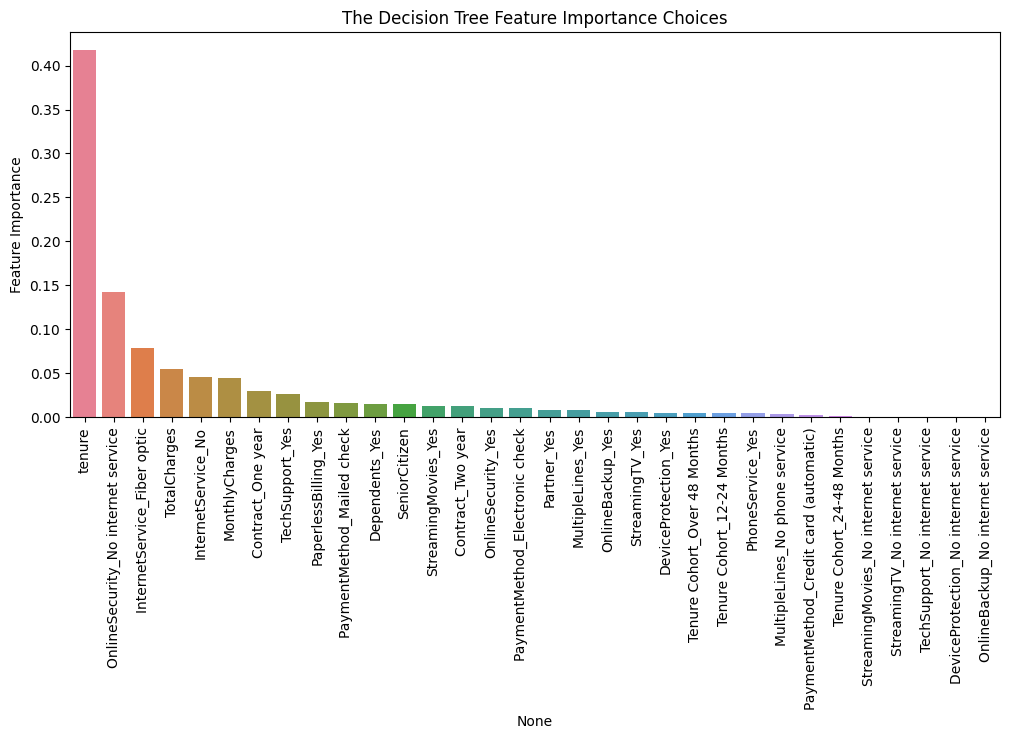

In [61]:
# Display the feature importance of the decision tree on a barplot
plt.figure(figsize=(12, 5))

sns.barplot(x=sorted_feature_importance.index, y=sorted_feature_importance['Feature Importance'], hue=sorted_feature_importance.index)

plt.title('The Decision Tree Feature Importance Choices')
plt.xticks(rotation=90);

So based on our single decision tree model, the `tenure` is the main features for spliting the data to make this predictive model by far. Certainly, we can improve out model metrics by making **ensemble models** such as a random forest, and even possibly improve them by **boosting methodologies** such as `Adaboosting` and `Gradient boosting`. 

Let's investigate them then:

## Random Forest Model:

**The steps I am going to perform are as follows:**
   1. Train a random model with a grid search for optimal hyperparameters.
   2. Evaluate performance metrics from the random forest model, including classification report and plotting a confusion matrix.
   3. Calculate feature importances from the decision tree and plot them on a barplot.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import FitFailedWarning
import warnings

rfc = RandomForestClassifier()

# Define the param_grid dictionary
param_grid = {
    'n_estimators': [100, 250, 300, 350],
    'max_depth': [25, 35, 45],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'log2']
}

# Instanciate the grid search object
rfc_grid_model = GridSearchCV(estimator=rfc, param_grid=param_grid)

# Suppress FitFailedWarning
with warnings.catch_warnings():
    warnings.simplefilter('ignore', FitFailedWarning)
    
    # Fit the model into training data
    rfc_grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [63]:
# Print the best parameters and the best score
print("Best parameters found: ", rfc_grid_model.best_params_)

# Get the predictions
pred_rfc = rfc_grid_model.predict(X_test)

print('The classification Report: ')
print()
print(classification_report(y_test, pred_rfc))

Best parameters found:  {'max_depth': 45, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 350}
The classification Report: 

              precision    recall  f1-score   support

          No       0.83      0.90      0.87       520
         Yes       0.64      0.49      0.56       184

    accuracy                           0.80       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.78      0.80      0.79       704



The Confusion Matrix: 



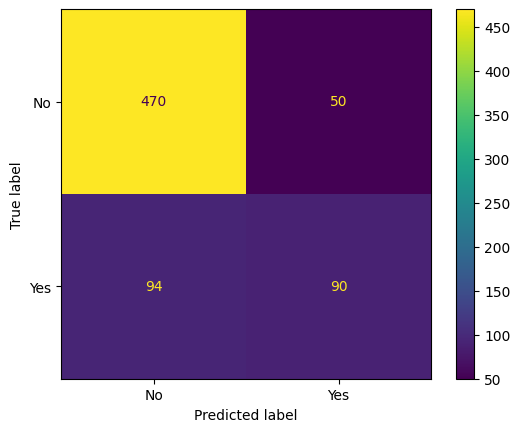

In [64]:
print('The Confusion Matrix: ')
print()
cm = confusion_matrix(y_test, pred_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=rfc_grid_model.classes_).plot();

In [65]:
# Add the random forest model metrics to the result dataframe
results_df = evaluate_and_append_results('Random Forest', rfc_grid_model, X_test, y_test, results_df)
results_df

,Model,Recall,F1 Score,Accuracy
0,Decision Tree,0.461957,0.526316,0.782670
1,Random Forest,0.489130,0.555556,0.795455


So the improvement of all evaluation metrics are clear as the `recall and f1 scores improved by almost 3% and the accuracy increased by 1.3%`. Now let's see if using `Adaboosting` and `Gradient Boosting` methodologies can further improve the random forest results.

## Boosted Methods Based on Tree Models:

Finally, I am going to build two popular boosting methods, `Adaboost Classifier` and `GradientBoosting Classifier`. Note that the estimator that I pass to this meta learners will be the default sklearn model which is a **DecisionTreeClassifier estimator**. However, there is this option to choose any other models as well but boosting methods usually tend to work better with tree-based models.

I am also going to perform grid search for finding the best hyper-parameter choices:

In [67]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Instanciate the base models
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Define the param_grid dictionary for Adabooster and Gradient Boddting
gb_param_grid = {'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [1, 5, 15],
             'n_estimators':[100, 250, 300, 350]}

ada_param_grid = {'learning_rate': [0.1, 0.05, 0.2],
             'n_estimators':[100, 250, 300, 350]}


In [68]:
# Instanciate the grid search model with the defined Adabooster based learner and the ada_param_grid dict
ada_grid_model = GridSearchCV(ada_model, param_grid=ada_param_grid)

# Fit the model with the training data
ada_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [100, 250, 300, 350]})

In [69]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=350)

In [70]:
# Instanciate the grid search model with the defined gradient boosting based learner and the gb_param_grid dict
gb_grid_model = GridSearchCV(gb_model, param_grid=gb_param_grid)

# Fit the model with the training data
gb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [1, 5, 15],
                         'n_estimators': [100, 250, 300, 350]})

In [71]:
gb_grid_model.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=350)

In [72]:
ada_pred = ada_grid_model.predict(X_test)
gb_pred = gb_grid_model.predict(X_test)

In [73]:
print('The classification Report For Adabooster Model: ')
print()
print(classification_report(y_test, ada_pred))

The classification Report For Adabooster Model: 

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       520
         Yes       0.66      0.47      0.55       184

    accuracy                           0.80       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.78      0.80      0.78       704



The Confusion Matrix For Adabooster Model: 



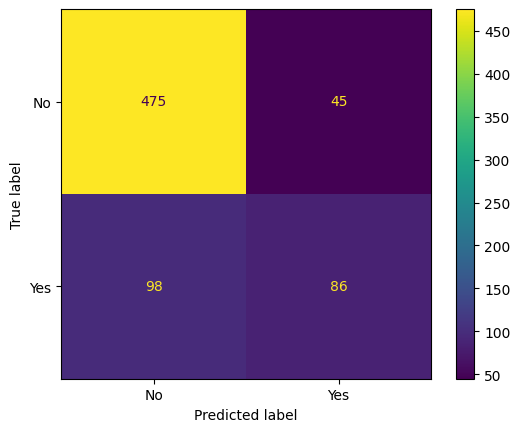

In [74]:
print('The Confusion Matrix For Adabooster Model: ')
print()
cm = confusion_matrix(y_test, ada_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_grid_model.classes_).plot();

In [75]:
print('The classification Report For Gradient Boosting Model: ')
print()
print(classification_report(y_test, gb_pred))

The classification Report For Gradient Boosting Model: 

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       520
         Yes       0.65      0.46      0.54       184

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704



The Confusion Matrix For Gradient Boosting Model: 



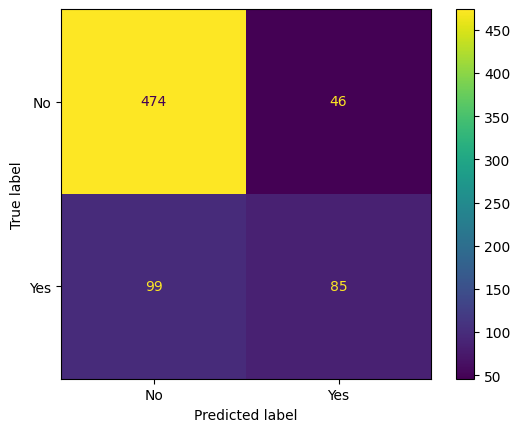

In [76]:
print('The Confusion Matrix For Gradient Boosting Model: ')
print()
cm = confusion_matrix(y_test, gb_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=gb_grid_model.classes_).plot();

In [77]:
# Add the Adabooster and Gradient Boosting models metrics to the result dataframe
results_df = evaluate_and_append_results('Adabooster', ada_grid_model, X_test, y_test, results_df)
results_df = evaluate_and_append_results('Gradient Boosting', gb_grid_model, X_test, y_test, results_df)
results_df

,Model,Recall,F1 Score,Accuracy
0,Decision Tree,0.461957,0.526316,0.782670
1,Random Forest,0.489130,0.555556,0.795455
2,Adabooster,0.467391,0.546032,0.796875
3,Gradient Boosting,0.461957,0.539683,0.794034


### Conclusion of the Project

The most interesting aspect of this project is that the **grid searched random forest**, outperformed the **Adabooster**, and **gradien boosting methods** in terms of `recall score` which is our main evaluation metric here. The **grid searched random forest** also performed better in terms of `F1 score`, however, their `accuracy scores` were all very close to each other.

If it was a real project for a company that I work for, my next steps for improving the models to choose the best one would be as follows:

- Allocate more time on hyper-parameter searching via grid search.

- Probably performing re-sampling of the **label=No_churn** in order to make the target variable more balanced.

- I would also try to use **non-tree models** and pass them to the boosting methods. It would be interesting to see how other algorithms such as `SVM` or `logestic regression` would work with boosting methods.


**Note:**

In this project, the main evaluation metric that we need to keep track of (and in fact, need to decrease) is the **`false negetives`**. Meaning that we need to **reduce the number of `false predictions` for people not churning, while they are actually about to churn!**

The **`false positives`** are not really that big of a deal compared to `false negatives` because in worst case scenario, we will send them some bonus offers and it will even make them more willing to stay although it might end up make the company lose some profits by offering unnecassary offers to users who did not want to churn.

# Part 4: Improving The Model Performance By Oversampling Minority Class:

### Step 1: StratifiedShuffleSplit Initialization:

I will use the `StratifiedShuffleSplit` from sklearn.model_selection module to split the data to preserve the percentage of samples for each class. This is particularly useful in datasets with class imbalance.

### Step 2: Data Splitting:

The split method of the splitter object is called with the feature matrix X and target vector y.
train_index and test_index contain the indices of the training and test sets, respectively.
These indices are then used to create the training and test sets (strat_X_train, strat_y_train, strat_X_test, strat_y_test).

### Step 3: Handling Imbalanced Data with SMOTE:

`SMOTE` is imported from imblearn.over_sampling. **SMOTE** generates synthetic samples for the minority class to address class imbalance. I
will use `threadpool_limits` to limit the number of threads for BLAS, which can improve performance and avoid multithreading issues.

SMOTE is applied to the training set (strat_X_train, strat_y_train), resulting in a new balanced training set (X_smote_train, y_smote_train).

In [92]:
# Split the data using stratified sampling (ensures that the proportion of each class is approximately the same in the train and test sets)
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, random_state=13, test_size=0.1)

for train, test in splitter.split(X, y):
    strat_X_train = X.iloc[train]
    strat_y_train = y.iloc[train]
    strat_X_test = X.iloc[test]
    strat_y_test = y.iloc[test]

In [79]:
print(strat_y_train.value_counts())
print(strat_y_test.value_counts())

Churn
No     4646
Yes    1682
Name: count, dtype: int64
Churn
No     517
Yes    187
Name: count, dtype: int64


In [80]:
# Check the proportion of churn=yes and churn=no in training and test split
print('The prportion of churn=yes and churn=no in training set is: ', np.round(4646/1682, 3))
print('The prportion of churn=yes and churn=no in test set is: ', np.round(517/187, 3))

The prportion of churn=yes and churn=no in training set is:  2.762
The prportion of churn=yes and churn=no in test set is:  2.765


In [81]:
from imblearn.over_sampling import SMOTE
from threadpoolctl import threadpool_limits

# Limit the number of threads used by BLAS (Basic Linear Algebra Subprograms)to avoid issues with multithreading and speed up processing
with threadpool_limits(limits=1, user_api='blas'):
    smote = SMOTE(random_state=13)
    X_smote_train, y_smote_train = smote.fit_resample(strat_X_train, strat_y_train)

Now I'll basically create the same `tree-based gradient-boosting and adabooster models` but this time I'll fit the **balanced training data** to see if we could improve the evaluation metrics for this classification task! 


### Gradient-Boosting Model with Balanced Target Class!

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Instanciate a second gradient-boosting model
gb_model_2 = GradientBoostingClassifier(max_depth=1, n_estimators=350)

# Fit the model with the balanced training data
gb_model_2.fit(X_smote_train, y_smote_train)

GradientBoostingClassifier(max_depth=1, n_estimators=350)

In [85]:
# Get the new predictions
gb_pred_balanced = gb_model_2.predict(strat_X_test)

# Print the classification report
print('The classification Report For Gradient Boosting Model With Balanced Classes: ')
print()
print(classification_report(strat_y_test, gb_pred_balanced))

The classification Report For Gradient Boosting Model With Balanced Classes: 

              precision    recall  f1-score   support

          No       0.87      0.81      0.84       517
         Yes       0.56      0.65      0.60       187

    accuracy                           0.77       704
   macro avg       0.71      0.73      0.72       704
weighted avg       0.78      0.77      0.78       704



The Confusion Matrix For Gradient Boosting Model With A Balanced Target Class: 



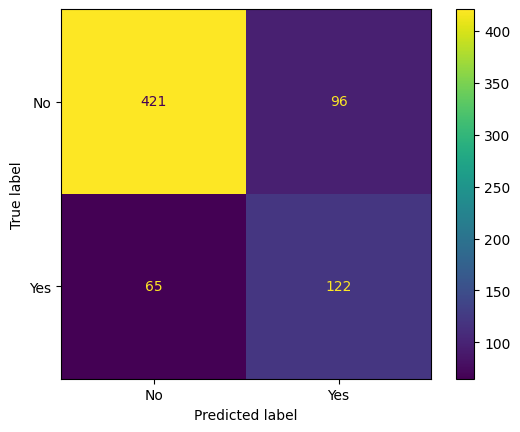

In [86]:
# Display the confusion matrix
print('The Confusion Matrix For Gradient Boosting Model With A Balanced Target Class: ')
print()
cm = confusion_matrix(strat_y_test, gb_pred_balanced)
ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=gb_model_2.classes_).plot();

### Adabooster Model with Balanced Target Class!

In [87]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning, message=".*SAMME.R algorithm.*")

    # Instanciate a second adabooster model
    ada_model_2 = AdaBoostClassifier(learning_rate=0.1, n_estimators=350)

    # Fit the model with the balanced training data
    ada_model_2.fit(X_smote_train, y_smote_train)

In [88]:
# Get the new predictions
ada_pred_balanced = ada_model_2.predict(strat_X_test)

# Print the classification report
print('The classification Report For Adabooster Model With A Balanced Target Class: ')
print()
print(classification_report(strat_y_test, ada_pred_balanced))

The classification Report For Adabooster Model With A Balanced Target Class: 

              precision    recall  f1-score   support

          No       0.87      0.81      0.84       517
         Yes       0.56      0.67      0.61       187

    accuracy                           0.77       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.79      0.77      0.78       704



The Confusion Matrix For Adabooster Model With A Balanced Target Class: 



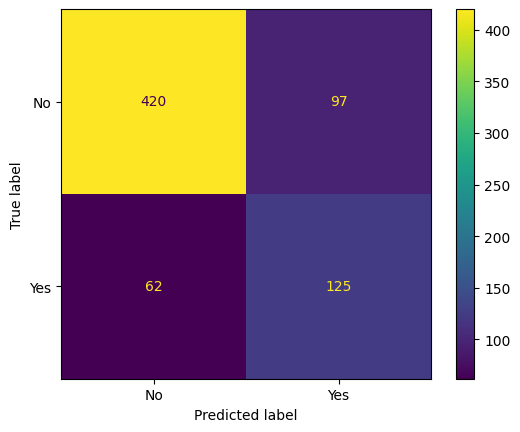

In [89]:
# Display the confusion matrix
print('The Confusion Matrix For Adabooster Model With A Balanced Target Class: ')
print()
cm = confusion_matrix(strat_y_test, ada_pred_balanced)
ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=ada_model_2.classes_).plot();

In [122]:
# Add the second Adabooster and Gradient-Boosting models to the result table
results_df = evaluate_and_append_results('Adabooster Model 2', ada_model_2, X_test, y_test, results_df)
results_df = evaluate_and_append_results('Gradient-Boosting Model 2', gb_model_2, X_test, y_test, results_df)


In [167]:
# Define a function to highlight specific rows with a red box including vertical borders
def highlight_rows(df):
    # Define the CSS styles for rows to highlight
    def row_style(index):
        if index in [4, 5]:  # Highlight rows with indices 3 and 4 (Python index is zero-based)
            return [
                'border-top: 2px solid red; border-bottom: 2px solid red;'
                'border-left: 2px solid red; border-right: 2px solid red;'
                if col_index == 1 else ''
                for col_index in range(len(df.columns))
            ]
        return [''] * len(df.columns)
    
    styles = pd.DataFrame([row_style(i) for i in df.index], index=df.index, columns=df.columns)
    return styles


In [168]:
# Display the results table and compare the various models' eval metrics
styled_result_df = results_df.style.apply(highlight_rows, axis=None)

# Display the styled DataFrame in a Jupyter Notebook
styled_result_df

,Model,Recall,F1 Score,Accuracy
0,Decision Tree,0.461957,0.526316,0.782670
1,Random Forest,0.489130,0.555556,0.795455
2,Adabooster,0.467391,0.546032,0.796875
3,Gradient Boosting,0.461957,0.539683,0.794034
4,Adabooster Model 2,0.663043,0.600985,0.769886
5,Gradient-Boosting Model 2,0.652174,0.598504,0.771307


So the oversampling method for the minority class actually performed very well. I achived improving the `recall score`, `F1 score`, and `Accuracy` of both boosting models significantly. The the `recall score` **increase by 17% and 16% respectively** from the random forest model to `Adabooster Model 2` and `Gradient-Boosting Model 2`. 